# 2. 複数のカラムで全ての組み合わせを持ったマスタを作成したい
すべての組み合わせを持ったマスタを作成する場合を検証します。  
このようなニーズがどこで発生するかというと、例えば、ゲーム内のユーザー毎に各アイテムの所持数の推移を日次で見たい場合に、ユーザー、日付、アイテムの全ての組み合わせを持ったマスターを作る必要があります。  
- ユーザーID (user_id)
- 日付 (date)
- アイテムID (item_id)
- アイテム名 (item_name)

In [1]:
from itertools import product
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from utilities.process_time import PandasProcessTimeMeasure

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
item_data = pd.read_csv('./data/game_user_item.csv')
item_data.head(5)

,user_id,date,item_id,item_name,item_purchase_count,payment
0,2855,2018-04-14,5,item005,0,0
1,9634,2018-05-23,4,item004,4,6000
2,5936,2018-05-28,10,item010,0,0
3,6635,2018-03-08,9,item009,2,3000
4,8864,2018-05-27,9,item009,1,1500


In [3]:
def create_values(sample_size):
    user_id_list = sorted(item_data.user_id.unique().tolist())
    date_list = sorted(item_data.date.unique().tolist())
    item_id_list = sorted(item_data.item_id.unique().tolist())
    item_name_list = sorted(item_data.item_name.unique().tolist())
    return user_id_list[:sample_size], date_list, item_id_list, item_name_list

## 方法1　1行毎にDataFrame化して`.append()`で積み上げる

In [4]:
def method1(sample_size):
    user_id_list, date_list, item_id_list, item_name_list = create_values(sample_size)
    master = pd.DataFrame()
    for user_id in user_id_list:
        for date in date_list:
            for item_id, item_name in zip(item_id_list, item_name_list):
                _master = pd.DataFrame(
                    data={
                        'user_id': [user_id],
                        'date': [date],
                        'item_id': [item_id],
                        'item_name': [item_name]
                    },
                    columns=['user_id', 'date', 'item_id', 'item_name']
                )
                master = master.append(_master)
    master.reset_index(drop=True, inplace=True)
    return master


method1(10).head(10)

,user_id,date,item_id,item_name
0,1,2018-01-01,1,item001
1,1,2018-01-01,2,item002
2,1,2018-01-01,3,item003
3,1,2018-01-01,4,item004
4,1,2018-01-01,5,item005
5,1,2018-01-01,6,item006
6,1,2018-01-01,7,item007
7,1,2018-01-01,8,item008
8,1,2018-01-01,9,item009
9,1,2018-01-01,10,item010


## 方法2　listで全組み合わせ作成後にDataFrame化する　`.append()`バージョン

In [5]:
def method2(sample_size):
        user_id_list, date_list, item_id_list, item_name_list = create_values(sample_size)
        master_user = []
        master_date = []
        master_item_id = []
        master_item_name = []
        for user_id in user_id_list:
            for date in date_list:
                for item_id, item_name in zip(item_id_list, item_name_list):
                    master_user.append(user_id)
                    master_date.append(date)
                    master_item_id.append(item_id)
                    master_item_name.append(item_name)
        master = pd.DataFrame(
            data={
                'user_id': master_user,
                'date': master_date,
                'item_id': master_item_id,
                'item_name': master_item_name
            },
            columns=['user_id', 'date', 'item_id', 'item_name']
        )
        return master


method2(10).head(10)

,user_id,date,item_id,item_name
0,1,2018-01-01,1,item001
1,1,2018-01-01,2,item002
2,1,2018-01-01,3,item003
3,1,2018-01-01,4,item004
4,1,2018-01-01,5,item005
5,1,2018-01-01,6,item006
6,1,2018-01-01,7,item007
7,1,2018-01-01,8,item008
8,1,2018-01-01,9,item009
9,1,2018-01-01,10,item010


## 方法3　listで全組み合わせ作成後にDataFrame化する　`.extend()`バージョン

In [6]:
def method3(sample_size):
        user_id_list, date_list, item_id_list, item_name_list = create_values(sample_size)
        master_user = []
        master_date = []
        master_item_id = []
        master_item_name = []
        n_item = len(item_id_list)
        for user_id in user_id_list:
            for date in date_list:
                master_user.extend([user_id] * n_item)
                master_date.extend([date] * n_item)
                master_item_id.extend(item_id_list)
                master_item_name.extend(item_name_list)
        master = pd.DataFrame(
            data={
                'user_id': master_user,
                'date': master_date,
                'item_id': master_item_id,
                'item_name': master_item_name
            },
            columns=['user_id', 'date', 'item_id', 'item_name']
        )
        return master


method3(10).head(10)

,user_id,date,item_id,item_name
0,1,2018-01-01,1,item001
1,1,2018-01-01,2,item002
2,1,2018-01-01,3,item003
3,1,2018-01-01,4,item004
4,1,2018-01-01,5,item005
5,1,2018-01-01,6,item006
6,1,2018-01-01,7,item007
7,1,2018-01-01,8,item008
8,1,2018-01-01,9,item009
9,1,2018-01-01,10,item010


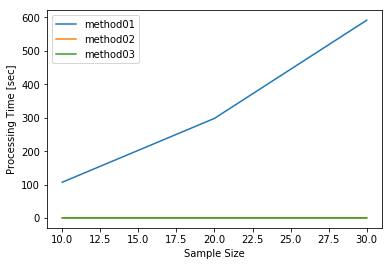

In [7]:
process_time_measure = PandasProcessTimeMeasure(
    sample_sizes=[10, 20, 30]
)
process_time_measure.set_method(name='method01', method=method1)
process_time_measure.set_method(name='method02', method=method2)
process_time_measure.set_method(name='method03', method=method3)
process_time_measure.measure_process_time_for_each_sample_sizes()
process_time_measure.plot_process_time()

In [8]:
process_time_measure.process_time

,method01,method02,method03
sample_size,,,
10,107.301365,0.529076,0.516198
20,298.265140,0.532413,0.549056
30,591.759437,0.546038,0.545157


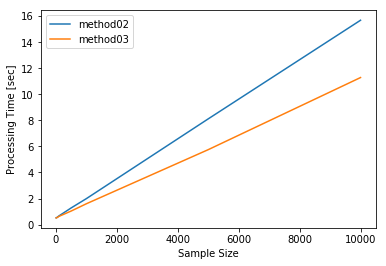

In [9]:
process_time_measure = PandasProcessTimeMeasure(
    sample_sizes=[10, 50, 100, 500, 1000, 5000, 10000]
)
process_time_measure.set_method(name='method02', method=method2)
process_time_measure.set_method(name='method03', method=method3)
process_time_measure.measure_process_time_for_each_sample_sizes()
process_time_measure.plot_process_time()

In [10]:
process_time_measure.process_time

,method02,method03
sample_size,,
10,0.519822,0.512880
50,0.572985,0.549018
100,0.664457,0.629464
500,1.275971,1.038292
1000,1.991046,1.598195
5000,8.112805,5.750179
10000,15.682714,11.285188
